In [25]:
import convokit
import numpy as np
from convokit import Corpus, Speaker, Utterance, download
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as st

In [2]:
#corpus = Corpus(filename=download("diplomacy-corpus"))
corpus = Corpus(filename=download("diplomacy-corpus"))

Dataset already exists at /Users/lynnette/.convokit/downloads/diplomacy-corpus


In [6]:
# Sum game score dict 
game_score_dict = {}
game_score_delta_dict = {}
for utt in corpus.iter_utterances():
    deception = utt.meta['deception_quadrant']
    game_score = int(utt.meta['game_score'])
    game_score_delta = int(utt.meta['game_score_delta'])
    
    if deception not in game_score_dict:
        game_score_dict[deception] = []
    game_score_dict[deception].append(game_score)
    
    if deception not in game_score_delta_dict:
        game_score_delta_dict[deception] = []
    game_score_delta_dict[deception].append(game_score_delta)    

In [10]:
avg_game_score_dict = {}
avg_game_score_delta_dict = {}

for k, v in game_score_dict.items():
    avg_game_score_dict[k] = sum(v) / len(v)
    
for k, v in game_score_delta_dict.items():
    avg_game_score_delta_dict[k] = sum(v) / len(v)

In [11]:
avg_game_score_dict

{'Straightforward': 5.398840296213497,
 'Unknown': 5.52589641434263,
 'Cassandra': 5.275862068965517,
 'Deceived': 6.1157742402315485,
 'Caught': 5.594594594594595}

In [12]:
avg_game_score_delta_dict

{'Straightforward': 0.042545759396395134,
 'Unknown': 0.09296148738379814,
 'Cassandra': 0.4077961019490255,
 'Deceived': 1.0347322720694645,
 'Caught': 0.6936936936936937}

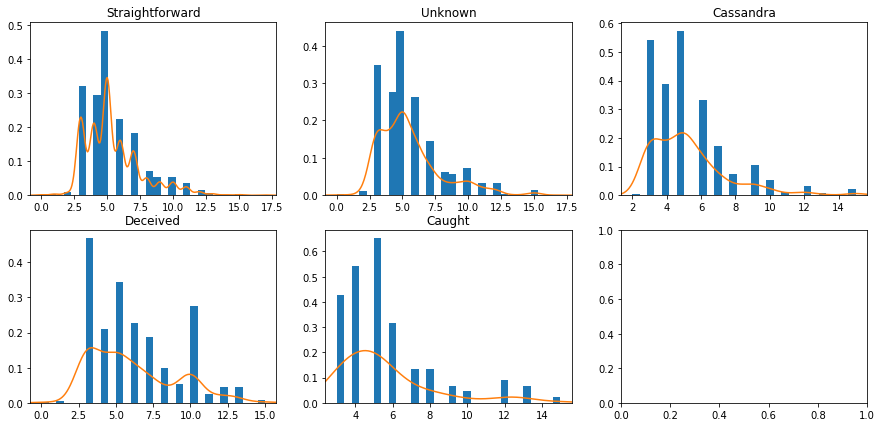

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))

for a, (k, v) in zip(ax.flatten(), game_score_dict.items()):
    a.hist(v, density=True, bins=30)  # `density=False` would make counts
    mn, mx = a.set_xlim()
    a.set_xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(v)
    a.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    a.set_title(k)
    
#plt.ylabel('Probability')
#plt.xlabel('Game Score');

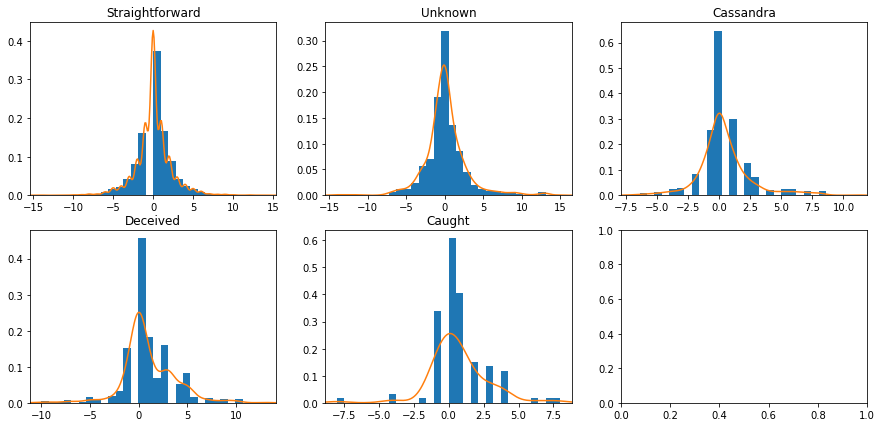

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))

for a, (k, v) in zip(ax.flatten(), game_score_delta_dict.items()):
    a.hist(v, density=True, bins=30)  # `density=False` would make counts
    mn, mx = a.set_xlim()
    a.set_xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(v)
    a.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    a.set_title(k)

In [59]:
sender_truth_lie_gamescore_dict = {}
sender_truth_lie_gamescore_delta_dict = {}

reciever_truth_lie_gamescore_dict = {}
reciever_truth_lie_gamescore_deltadict = {}

for utt in corpus.iter_utterances():
    sender = utt.meta['speaker_intention']
    reciever = utt.meta['receiver_perception']
    game_score = int(utt.meta['game_score'])
    game_score_delta = int(utt.meta['game_score_delta'])
    
    if sender not in sender_truth_lie_gamescore_dict:
        sender_truth_lie_gamescore_dict[sender] = []
    sender_truth_lie_gamescore_dict[sender].append(game_score)
    
    if reciever not in reciever_truth_lie_gamescore_dict:
        reciever_truth_lie_gamescore_dict[reciever] = []
    reciever_truth_lie_gamescore_dict[reciever].append(game_score)
    
    if sender not in sender_truth_lie_gamescore_delta_dict:
        sender_truth_lie_gamescore_delta_dict[sender] = []
    sender_truth_lie_gamescore_delta_dict[sender].append(game_score_delta)
    
    if reciever not in reciever_truth_lie_gamescore_deltadict:
        reciever_truth_lie_gamescore_deltadict[reciever] = []
    reciever_truth_lie_gamescore_deltadict[reciever].append(game_score_delta)

{'Truth': 5.39867089379344, 'Lie': 6.108229988726043}


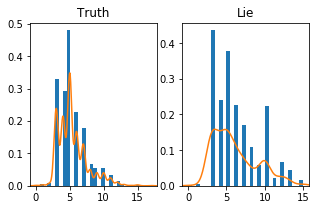

In [67]:
avg_dict = {}
for k, v in sender_truth_lie_gamescore_dict.items():
    avg_dict[k] = sum(v) / len(v)
print(avg_dict)
    
fig, ax = plt.subplots(1, 2, figsize=(5,3))

for a, (k, v) in zip(ax.flatten(), sender_truth_lie_gamescore_dict.items()):
    a.hist(v, density=True, bins=30)  # `density=False` would make counts
    mn, mx = a.set_xlim()
    a.set_xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(v)
    a.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    a.set_title(k)

{'Truth': 0.05456651627850262, 'Lie': 1.0349492671927847}


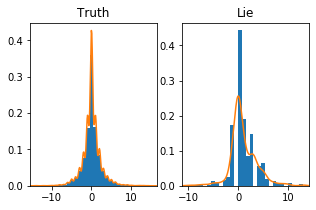

In [68]:
avg_dict = {}
for k, v in sender_truth_lie_gamescore_delta_dict.items():
    avg_dict[k] = sum(v) / len(v)
print(avg_dict)
    
fig, ax = plt.subplots(1, 2, figsize=(5,3))

for a, (k, v) in zip(ax.flatten(), sender_truth_lie_gamescore_delta_dict.items()):
    a.hist(v, density=True, bins=30)  # `density=False` would make counts
    mn, mx = a.set_xlim()
    a.set_xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(v)
    a.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    a.set_title(k)

{'Truth': 5.431856047984005, None: 5.52589641434263, 'Lie': 5.32133676092545}


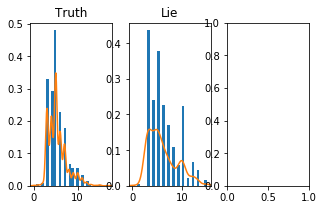

In [72]:
avg_dict = {}
for k, v in reciever_truth_lie_gamescore_dict.items():
    avg_dict[k] = sum(v) / len(v)
print(avg_dict)
    
fig, ax = plt.subplots(1, 3, figsize=(5,3))

for a, (k, v) in zip(ax.flatten(), sender_truth_lie_gamescore_dict.items()):
    a.hist(v, density=True, bins=30)  # `density=False` would make counts
    mn, mx = a.set_xlim()
    a.set_xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(v)
    a.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    a.set_title(k)

In [ ]:
### avg_dict = {}
for k, v in reciever_truth_lie_gamescore_deltadict.items():
    avg_dict[k] = sum(v) / len(v)
print(avg_dict)
    
fig, ax = plt.subplots(1, 2, figsize=(5,3))

for a, (k, v) in zip(ax.flatten(), sender_truth_lie_gamescore_dict.items()):
    a.hist(v, density=True, bins=30)  # `density=False` would make counts
    mn, mx = a.set_xlim()
    a.set_xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 301)
    kde = st.gaussian_kde(v)
    a.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    a.set_title(k)

In [11]:
convo = corpus.random_conversation()

In [12]:
convo.get_utterances_dataframe()

,timestamp,text,speaker,reply_to,conversation_id,meta.speaker_intention,meta.receiver_perception,meta.receiver,meta.absolute_message_index,meta.relative_message_index,meta.year,meta.game_score,meta.game_score_delta,meta.deception_quadrant
id,,,,,,,,,,,,,,
Game5-england-russia-0,29,"Hello, England! What's your general train of t...",russia-Game5,None,Game5-england-russia,Truth,Truth,england-Game5,29,0,1901,4,1,Straightforward
Game5-england-russia-1,32,Not quite sure yet to be honest -- still tryin...,england-Game5,Game5-england-russia-0,Game5-england-russia,Lie,Truth,russia-Game5,32,1,1901,3,-1,Deceived
Game5-england-russia-2,33,Any ideas on your end?,england-Game5,Game5-england-russia-1,Game5-england-russia,Truth,Truth,russia-Game5,33,2,1901,3,-1,Straightforward
Game5-england-russia-3,34,My inclination is to focus south. I won't put ...,russia-Game5,Game5-england-russia-2,Game5-england-russia,Truth,Truth,england-Game5,34,3,1901,4,1,Straightforward
Game5-england-russia-4,36,That sounds good to me,england-Game5,Game5-england-russia-3,Game5-england-russia,Lie,Truth,russia-Game5,36,4,1901,3,-1,Deceived
Game5-england-russia-5,37,I just hope you're not planning a Juggernaut ~...,england-Game5,Game5-england-russia-4,Game5-england-russia,Truth,Truth,russia-Game5,37,5,1901,3,-1,Straightforward
Game5-england-russia-6,38,"otherwise tho, I'll be more than happy to just...",england-Game5,Game5-england-russia-5,Game5-england-russia,Lie,Truth,russia-Game5,38,6,1901,3,-1,Deceived
Game5-england-russia-7,39,I think that Russia's game is simplest when Tu...,russia-Game5,Game5-england-russia-6,Game5-england-russia,Truth,Lie,england-Game5,39,7,1901,4,1,Cassandra
Game5-england-russia-8,43,"Great, glad we'll be able to work together then",england-Game5,Game5-england-russia-7,Game5-england-russia,Lie,Truth,russia-Game5,43,8,1901,3,-1,Deceived


In [28]:
coord = convokit.Coordination()
coord.fit(corpus)
#coord.transform(corpus)

In [9]:
corpus.get_utterance('Game2-turkey-england-0')

Utterance({'obj_type': 'utterance', 'meta': {'speaker_intention': 'Truth', 'receiver_perception': 'Truth', 'receiver': 'england-Game2', 'absolute_message_index': 861, 'relative_message_index': 0, 'year': '1902', 'game_score': '5', 'game_score_delta': '0', 'deception_quadrant': 'Straightforward', 'liwc-categories': {'preps', 'article', 'auxverb', 'ppron', 'ipron', 'adverb', 'conj'}}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'country': 'turkey', 'coord-score': {'italy-Game2': {'article': -0.023529411764705854, 'auxverb': 0.01225490196078427, 'conj': 0.11594202898550732, 'adverb': -0.027450980392156876, 'ppron': -0.0301659125188537, 'ipron': -0.023529411764705854, 'preps': -0.014260249554367221, 'quant': -0.07450980392156864}, 'germany-Game2': {'article': 0.037878787878787845, 'auxverb': 0.07900432900432908, 'conj': 0.21190476190476193, 'adverb': 0.02813852813852813, 'ppron': 0.07142857142857151, 'ipron': 0.024725274725274693, 'preps': 0.07539682539682546, 'quant

In [22]:
corpus.get_utterance('Game2-turkey-england-0').meta

{'speaker_intention': 'Truth',
 'receiver_perception': 'Truth',
 'receiver': 'england-Game2',
 'absolute_message_index': 861,
 'relative_message_index': 0,
 'year': '1902',
 'game_score': '5',
 'game_score_delta': '0',
 'deception_quadrant': 'Straightforward',
 'liwc-categories': {'adverb',
  'article',
  'auxverb',
  'conj',
  'ipron',
  'ppron',
  'preps'}}

In [13]:
corpus.get_speaker('turkey-Game2')

Speaker({'obj_type': 'speaker', 'meta': {'country': 'turkey', 'coord-score': {'italy-Game2': {'article': -0.023529411764705854, 'auxverb': 0.01225490196078427, 'conj': 0.11594202898550732, 'adverb': -0.027450980392156876, 'ppron': -0.0301659125188537, 'ipron': -0.023529411764705854, 'preps': -0.014260249554367221, 'quant': -0.07450980392156864}, 'germany-Game2': {'article': 0.037878787878787845, 'auxverb': 0.07900432900432908, 'conj': 0.21190476190476193, 'adverb': 0.02813852813852813, 'ppron': 0.07142857142857151, 'ipron': 0.024725274725274693, 'preps': 0.07539682539682546, 'quant': 0.16666666666666669}, 'austria-Game2': {'article': 0.046345811051693386, 'auxverb': 0.005827505827505797, 'conj': 0.07486631016042783, 'adverb': 0.019138755980861233, 'ppron': -0.010489510489510523, 'ipron': 0.09090909090909083, 'preps': 0.0572390572390572, 'quant': -0.11742424242424243}, 'russia-Game2': {'article': 0.16666666666666663, 'auxverb': 0.0, 'conj': 0.16666666666666663, 'adverb': -0.083333333333

In [18]:
coord.precompute(corpus)

In [33]:
pair_scores = coord.pairwise_scores(corpus, corpus.speaking_pairs())

In [38]:
pair_scores

{(Speaker({'obj_type': 'speaker', 'meta': {'country': 'germany'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fb36be3e490>, 'id': 'germany-Game1'}),
  Speaker({'obj_type': 'speaker', 'meta': {'country': 'italy'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fb36be3e490>, 'id': 'italy-Game1'})): {'article': 0.08909090909090911,
  'auxverb': 0.005945945945945996,
  'conj': 0.02081081081081082,
  'adverb': 0.009130434782608665,
  'ppron': -0.0035955056179775013,
  'ipron': 0.003030303030302939,
  'preps': -0.01764705882352946,
  'quant': -0.07363636363636367},
 (Speaker({'obj_type': 'speaker', 'meta': {'country': 'italy'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fb36be3e490>, 'id': 'italy-Game1'}),
  Speaker({'obj_type': 'speaker', 'meta': {'country': 'germany'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fb36be3e490>, 'id': 'germany-Game1'})): {'article': 0.08533611981887845,
  'auxverb': 0.01

In [42]:
avg_speakers = pair_scores.averages_by_speaker()

In [47]:
for key, value in avg_speakers.items():
    print(key[0].id, key[1].id, value)
    print()

germany-Game1 italy-Game1 0.004141184447838363

italy-Game1 germany-Game1 0.022699058582968723

italy-Game1 austria-Game1 -0.0012216633448250969

austria-Game1 italy-Game1 -0.008628483824991373

italy-Game1 russia-Game1 0.057114114333941896

russia-Game1 italy-Game1 0.028469719097034094

italy-Game1 england-Game1 0.010081939922461564

england-Game1 italy-Game1 0.006162180086795747

italy-Game1 turkey-Game1 0.013888888888888895

turkey-Game1 italy-Game1 0.020408163265306152

italy-Game1 france-Game1 0.01025680331020886

france-Game1 italy-Game1 0.051151561420324065

germany-Game1 austria-Game1 -0.03849206349206348

austria-Game1 germany-Game1 0.016666666666666663

germany-Game1 russia-Game1 -0.024031279178337986

russia-Game1 germany-Game1 0.040485739750445615

germany-Game1 england-Game1 0.014698809548090747

england-Game1 germany-Game1 0.020514638746234305

germany-Game1 france-Game1 0.046621934528683975

france-Game1 germany-Game1 -0.013711230987174389

russia-Game1 austria-Game1 0.0

In [5]:
convo.get_utterance_ids()

['Game7-germany-italy-0',
 'Game7-germany-italy-1',
 'Game7-germany-italy-2',
 'Game7-germany-italy-3',
 'Game7-germany-italy-4',
 'Game7-germany-italy-5',
 'Game7-germany-italy-6',
 'Game7-germany-italy-7',
 'Game7-germany-italy-8',
 'Game7-germany-italy-9',
 'Game7-germany-italy-10',
 'Game7-germany-italy-11',
 'Game7-germany-italy-12',
 'Game7-germany-italy-13',
 'Game7-germany-italy-14',
 'Game7-germany-italy-15',
 'Game7-germany-italy-16',
 'Game7-germany-italy-17',
 'Game7-germany-italy-18']

In [26]:
corpus.has_conversation('Game8-germany-russia')

True

In [27]:
con = corpus.get_conversation('Game8-germany-russia')

In [28]:
for utt in con.iter_utterances():
    print(utt.id, utt.reply_to)

Game8-germany-russia-0 None
Game8-germany-russia-1 Game8-germany-russia-0
Game8-germany-russia-2 Game8-germany-russia-1
Game8-germany-russia-3 Game8-germany-russia-2
Game8-germany-russia-4 Game8-germany-russia-3
Game8-germany-russia-5 Game8-germany-russia-4
Game8-germany-russia-6 Game8-germany-russia-5
Game8-germany-russia-7 Game8-germany-russia-6
Game8-germany-russia-8 Game8-germany-russia-7
Game8-germany-russia-9 Game8-germany-russia-8
Game8-germany-russia-10 Game8-germany-russia-9
Game8-germany-russia-11 Game8-germany-russia-10
Game8-germany-russia-12 Game8-germany-russia-11
Game8-germany-russia-13 Game8-germany-russia-12
Game8-germany-russia-14 Game8-germany-russia-13
Game8-germany-russia-15 Game8-germany-russia-14
Game8-germany-russia-16 Game8-germany-russia-15
Game8-germany-russia-17 Game8-germany-russia-16
Game8-germany-russia-18 Game8-germany-russia-17
Game8-germany-russia-19 Game8-germany-russia-18
Game8-germany-russia-20 Game8-germany-russia-19
Game8-germany-russia-21 Game8-g

In [6]:
corpus.has_utterance('Game7-germany-italy-0')

True

In [7]:
corpus.get_utterance('Game7-germany-italy-0')

Utterance({'obj_type': 'utterance', 'meta': {'speaker_intention': 'Truth', 'receiver_perception': None, 'receiver': 'italy-Game7', 'absolute_message_index': 58, 'relative_message_index': 0, 'year': '1901', 'game_score': '3', 'game_score_delta': '0', 'deception_quadrant': 'Unknown'}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'country': 'germany'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fa7c1752430>, 'id': 'germany-Game7'}), 'conversation_id': 'Game7-germany-italy', 'reply_to': None, 'timestamp': 58, 'text': 'Hello! What are your initial plans?', 'owner': <convokit.model.corpus.Corpus object at 0x7fa7c1752430>, 'id': 'Game7-germany-italy-0'})

In [15]:
corpus_1 = corpus.reindex_conversations(['Game7-germany-italy-0'], preserve_corpus_meta=True)

KeyError: 'Game7-germany-italy-0'

In [30]:
corpus_2 = Corpus(utterances=list(convo.iter_utterances()))

In [31]:
corpus_2.print_summary_stats()

Number of Speakers: 2
Number of Utterances: 23
Number of Conversations: 1


In [32]:
coord = convokit.Coordination()
coord.fit(corpus_2)

In [52]:
coord.transform(corpus_2)

In [53]:
speakers_list = list(corpus_2.iter_speakers())

In [37]:
speakers_to_speakers = coord.score(corpus_2, speakers_list, speakers_list)

In [38]:
for speaker, score in sorted(speakers_to_speakers.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    speaker_id = speaker._id
    speaker_meta = speaker.meta
    coord_score = speaker_meta['coord-score']
    for key, group in coord_score.items():
        avg_coord = np.array(list(group.values())).mean()
        print(speaker_id, key, avg_coord)
print()

russia-Game8 germany-Game8 0.02777777777777779
germany-Game8 russia-Game8 -0.018601190476190486



In [40]:
pairwise_speakers_zip = zip(speakers_list, speakers_list)

In [54]:
speakers_to_speakers_pairwise = coord.pairwise_scores(corpus_2, [('russia-Game8', 'germany-Game8')], 
                                                      target_thresh=0, speaker_thresh=0)

In [55]:
list(corpus_2.iter_speakers())

[Speaker({'obj_type': 'speaker', 'meta': {'country': 'russia', 'coord-score': {'germany-Game8': {'auxverb': 0.08333333333333337, 'ppron': -0.04166666666666663, 'preps': 0.04166666666666663}}}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fa7c808eeb0>, 'id': 'russia-Game8'}),
 Speaker({'obj_type': 'speaker', 'meta': {'country': 'germany', 'coord-score': {'russia-Game8': {'article': 0.0, 'auxverb': -0.0535714285714286, 'conj': 0.04166666666666666, 'adverb': 0.0, 'ppron': 0.0, 'ipron': -0.08333333333333334, 'preps': -0.0535714285714286, 'quant': 0.0}}}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7fa7c808eeb0>, 'id': 'germany-Game8'})]

In [56]:
speakers_to_speakers_pairwise

{}

In [58]:
_, a_score_by_marker, agg1, agg2, agg3 = coord.score_report(corpus_2, speakers_to_speakers)

In [59]:
agg3

0.004588293650793652

In [60]:
agg2

-0.006696428571428575

In [61]:
a_score_by_marker

{'auxverb': 0.014880952380952384,
 'ppron': -0.020833333333333315,
 'preps': -0.005952380952380987,
 'article': 0.0,
 'conj': 0.04166666666666666,
 'adverb': 0.0,
 'ipron': -0.08333333333333334,
 'quant': 0.0}

In [62]:
_

{'article': 0.0,
 'auxverb': -0.0535714285714286,
 'conj': 0.04166666666666666,
 'adverb': 0.0,
 'ppron': 0.0,
 'ipron': -0.08333333333333334,
 'preps': -0.0535714285714286,
 'quant': 0.0}

In [10]:
coord = convokit.Coordination()
coord.fit(corpus)

In [11]:
coord.transform(corpus)

In [13]:
speakers_list = list(corpus.iter_speakers())

In [14]:
speakers_to_speakers = coord.score(corpus, speakers_list, speakers_list)

In [15]:
for speaker, score in sorted(speakers_to_speakers.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    speaker_id = speaker._id
    speaker_meta = speaker.meta
    coord_score = speaker_meta['coord-score']
    for key, group in coord_score.items():
        avg_coord = np.array(list(group.values())).mean()
        print(speaker_id, key, avg_coord)
print()

austria-Game7 italy-Game7 0.09364974695587053
austria-Game7 germany-Game7 0.007027000777000768
austria-Game7 russia-Game7 0.051385068158965194
austria-Game7 england-Game7 0.01645541958041956
austria-Game7 turkey-Game7 0.04498106060606061
austria-Game7 france-Game7 0.06785714285714284
turkey-Game6 germany-Game6 0.038071303696303724
turkey-Game6 russia-Game6 0.07589285714285714
turkey-Game6 england-Game6 0.0
turkey-Game6 france-Game6 0.05966408999497236
france-Game3 italy-Game3 -0.017943848269893148
france-Game3 germany-Game3 0.056791235080708796
france-Game3 england-Game3 0.09048905042326094
russia-Game7 italy-Game7 0.0955592691622103
russia-Game7 germany-Game7 0.07391098484848484
russia-Game7 austria-Game7 0.027404308530869885
russia-Game7 england-Game7 0.06202346468890587
russia-Game7 turkey-Game7 0.0069444444444444475
russia-Game7 france-Game7 0.008035714285714278
turkey-Game10 austria-Game10 -0.008333333333333338
turkey-Game10 russia-Game10 -0.02380952380952382
england-Game5 italy-G